In [1]:
import os
import glob
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.applications import DenseNet121
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from keras.layers.wrappers import TimeDistributed
from keras.layers.core import Dense, Dropout, Flatten, Activation
from keras.layers.convolutional import Conv1D, MaxPooling1D,MaxPooling2D
from keras.layers.recurrent import LSTM,GRU
from keras.layers import Bidirectional
from keras.layers.pooling import GlobalAveragePooling1D
from keras.layers import Dropout
import matplotlib.pyplot as plt
stlf_data=pd.read_csv('C:\\Users\\Khalid\\Desktop\\stlf_github\\stlf_sim\\Data/02_Feb.csv')

In [2]:
stlf_data

,Temp,Hum,A,B,C,D,E,F,G,H,I,J,Cons
0,13.000000,83.000000,1,4,1,1629.0,1813.0,1838.0,1507.0,1391.0,1561.0,1693.500000,1505.0
1,12.833333,83.416667,1,4,1,1579.0,1755.0,1834.0,1451.0,1364.0,1517.0,1663.083333,1469.0
2,12.666667,83.833333,1,4,1,1557.0,1712.0,1861.0,1467.0,1318.0,1505.0,1629.833333,1462.0
3,12.500000,84.250000,1,4,1,1539.0,1662.0,1876.0,1449.0,1325.0,1489.0,1590.833333,1408.0
4,12.333333,84.666667,2,4,1,1505.0,1629.0,1813.0,1438.0,1313.0,1455.0,1557.833333,1417.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8059,13.372452,78.029950,23,5,1,1837.0,1898.0,1992.0,1722.0,1738.0,1589.0,1850.583333,1687.0
8060,13.372452,78.029950,24,5,1,1808.0,1878.0,1975.0,1684.0,1708.0,1538.0,1825.416667,1673.0
8061,13.372452,78.029950,24,5,1,1770.0,1875.0,1930.0,1581.0,1665.0,1409.0,1803.416667,1666.0
8062,13.100000,78.029950,24,5,1,1765.0,1863.0,1921.0,1535.0,1612.0,1346.0,1778.416667,1621.0


In [3]:
stlf_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8064 entries, 0 to 8063
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Temp    8064 non-null   float64
 1   Hum     8064 non-null   float64
 2   A       8064 non-null   int64  
 3   B       8064 non-null   int64  
 4   C       8064 non-null   int64  
 5   D       8064 non-null   float64
 6   E       8064 non-null   float64
 7   F       8064 non-null   float64
 8   G       8064 non-null   float64
 9   H       8064 non-null   float64
 10  I       8064 non-null   float64
 11  J       8064 non-null   float64
 12  Cons    8064 non-null   float64
dtypes: float64(10), int64(3)
memory usage: 819.1 KB


In [4]:
import numpy as np
stlf_data['A']=stlf_data['A'].astype(np.float64)
stlf_data['B']=stlf_data['B'].astype(np.float64)
stlf_data['C']=stlf_data['C'].astype(np.float64)

In [5]:
stlf_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8064 entries, 0 to 8063
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Temp    8064 non-null   float64
 1   Hum     8064 non-null   float64
 2   A       8064 non-null   float64
 3   B       8064 non-null   float64
 4   C       8064 non-null   float64
 5   D       8064 non-null   float64
 6   E       8064 non-null   float64
 7   F       8064 non-null   float64
 8   G       8064 non-null   float64
 9   H       8064 non-null   float64
 10  I       8064 non-null   float64
 11  J       8064 non-null   float64
 12  Cons    8064 non-null   float64
dtypes: float64(13)
memory usage: 819.1 KB


In [6]:
T = 11
HORIZON = 1


In [7]:
train = stlf_data.copy()[stlf_data.index <= 6816][['Cons','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = StandardScaler()
train[['Cons', 'Temp', 'Hum', 'A','B','C','D','E','F','G','H','I','J']] = scaler.fit_transform(train)
train.head()
#train.info()

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
0,-1.106131,-0.937848,1.071355,-1.660867,-0.014303,0.670218,-0.610396,0.123904,0.224613,-1.082382,-1.523442,-0.823597,-0.373055
1,-1.249625,-0.974197,1.094306,-1.660867,-0.014303,0.670218,-0.809639,-0.107273,0.208663,-1.307053,-1.630921,-0.997397,-0.501139
2,-1.277526,-1.010546,1.117257,-1.660867,-0.014303,0.670218,-0.897306,-0.278664,0.316330,-1.242861,-1.814034,-1.044797,-0.641153
3,-1.492768,-1.046896,1.140209,-1.660867,-0.014303,0.670218,-0.969034,-0.477954,0.376145,-1.315077,-1.786169,-1.107997,-0.805380
4,-1.456894,-1.083245,1.163160,-1.516422,-0.014303,0.670218,-1.104519,-0.609486,0.124922,-1.359208,-1.833937,-1.242297,-0.944341


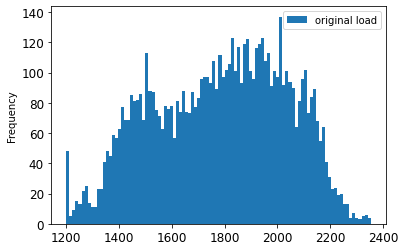

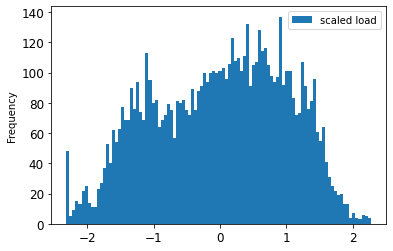

In [9]:
stlf_data[stlf_data.index <= 6816][['Cons']].rename(columns={'Cons':'original load'}).plot.hist(bins=100, fontsize=12)
train[train.index <= 6816][['Cons']].rename(columns={'Cons':'scaled load'}).plot.hist(bins=100, fontsize=12)
plt.show()

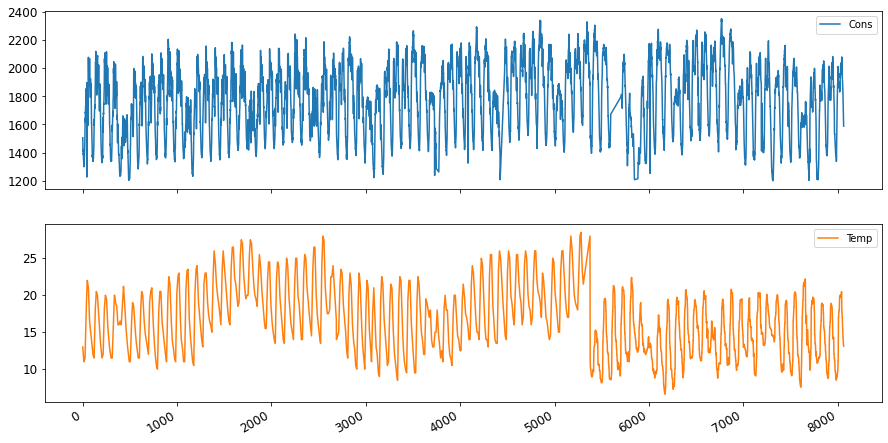

In [10]:
import matplotlib.pyplot as plt
stlf_data.plot(y=['Cons', 'Temp'], subplots=True, figsize=(15, 8), fontsize=12)
plt.show()

In [11]:
train_shifted = train.copy()
train_shifted=train_shifted.astype(np.float64)
train_shifted['y_t+100'] = train_shifted['Cons'].shift(-100)
train_shifted.head(10)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+100
0,-1.106131,-0.937848,1.071355,-1.660867,-0.014303,0.670218,-0.610396,0.123904,0.224613,-1.082382,-1.523442,-0.823597,-0.373055,-1.409063
1,-1.249625,-0.974197,1.094306,-1.660867,-0.014303,0.670218,-0.809639,-0.107273,0.208663,-1.307053,-1.630921,-0.997397,-0.501139,-1.524655
2,-1.277526,-1.010546,1.117257,-1.660867,-0.014303,0.670218,-0.897306,-0.278664,0.316330,-1.242861,-1.814034,-1.044797,-0.641153,-1.652205
3,-1.492768,-1.046896,1.140209,-1.660867,-0.014303,0.670218,-0.969034,-0.477954,0.376145,-1.315077,-1.786169,-1.107997,-0.805380,-1.588430
4,-1.456894,-1.083245,1.163160,-1.516422,-0.014303,0.670218,-1.104519,-0.609486,0.124922,-1.359208,-1.833937,-1.242297,-0.944341,-1.624304
5,-1.572486,-1.119594,1.186112,-1.516422,-0.014303,0.670218,-1.247974,-0.808777,-0.106363,-1.555795,-1.957339,-1.376597,-1.073126,-1.672135
6,-1.552557,-1.155943,1.209063,-1.516422,-0.014303,0.670218,-1.275868,-0.896465,-0.277832,-1.628011,-2.032973,-1.412147,-1.185067,-1.640248
7,-1.632276,-1.192293,1.232014,-1.516422,-0.014303,0.670218,-1.491050,-0.968209,-0.477216,-1.708250,-2.092683,-1.447697,-1.286481,-1.660177
8,-1.743882,-1.228642,1.254966,-1.371978,-0.014303,0.670218,-1.455187,-1.103727,-0.608808,-1.712262,-2.140452,-1.585946,-1.386140,-1.723952
9,-1.751854,-1.264991,1.277917,-1.371978,-0.014303,0.670218,-1.570747,-1.247217,-0.808192,-1.704238,-2.128510,-1.585946,-1.468955,-1.775770


In [12]:
for t in range(1, T+1):
    train_shifted['Cons_t-'+str(T-t)] = train_shifted['Cons'].shift(T-t)
train_shifted = train_shifted.rename(columns={'Cons':'Cons_original'})
train_shifted.head(10)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,...,Cons_t-9,Cons_t-8,Cons_t-7,Cons_t-6,Cons_t-5,Cons_t-4,Cons_t-3,Cons_t-2,Cons_t-1,Cons_t-0
0,-1.106131,-0.937848,1.071355,-1.660867,-0.014303,0.670218,-0.610396,0.123904,0.224613,-1.082382,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.106131
1,-1.249625,-0.974197,1.094306,-1.660867,-0.014303,0.670218,-0.809639,-0.107273,0.208663,-1.307053,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.106131,-1.249625
2,-1.277526,-1.010546,1.117257,-1.660867,-0.014303,0.670218,-0.897306,-0.278664,0.316330,-1.242861,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.106131,-1.249625,-1.277526
3,-1.492768,-1.046896,1.140209,-1.660867,-0.014303,0.670218,-0.969034,-0.477954,0.376145,-1.315077,...,NaN,NaN,NaN,NaN,NaN,NaN,-1.106131,-1.249625,-1.277526,-1.492768
4,-1.456894,-1.083245,1.163160,-1.516422,-0.014303,0.670218,-1.104519,-0.609486,0.124922,-1.359208,...,NaN,NaN,NaN,NaN,NaN,-1.106131,-1.249625,-1.277526,-1.492768,-1.456894
5,-1.572486,-1.119594,1.186112,-1.516422,-0.014303,0.670218,-1.247974,-0.808777,-0.106363,-1.555795,...,NaN,NaN,NaN,NaN,-1.106131,-1.249625,-1.277526,-1.492768,-1.456894,-1.572486
6,-1.552557,-1.155943,1.209063,-1.516422,-0.014303,0.670218,-1.275868,-0.896465,-0.277832,-1.628011,...,NaN,NaN,NaN,-1.106131,-1.249625,-1.277526,-1.492768,-1.456894,-1.572486,-1.552557
7,-1.632276,-1.192293,1.232014,-1.516422,-0.014303,0.670218,-1.491050,-0.968209,-0.477216,-1.708250,...,NaN,NaN,-1.106131,-1.249625,-1.277526,-1.492768,-1.456894,-1.572486,-1.552557,-1.632276
8,-1.743882,-1.228642,1.254966,-1.371978,-0.014303,0.670218,-1.455187,-1.103727,-0.608808,-1.712262,...,NaN,-1.106131,-1.249625,-1.277526,-1.492768,-1.456894,-1.572486,-1.552557,-1.632276,-1.743882
9,-1.751854,-1.264991,1.277917,-1.371978,-0.014303,0.670218,-1.570747,-1.247217,-0.808192,-1.704238,...,-1.106131,-1.249625,-1.277526,-1.492768,-1.456894,-1.572486,-1.552557,-1.632276,-1.743882,-1.751854


In [13]:
# For debugging why val_loss gives NaN
train_shifted.tail(10)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,...,Cons_t-9,Cons_t-8,Cons_t-7,Cons_t-6,Cons_t-5,Cons_t-4,Cons_t-3,Cons_t-2,Cons_t-1,Cons_t-0
6807,0.874884,-0.900237,1.699535,1.372465,0.985708,0.670218,0.979563,1.554811,1.735938,0.682888,...,1.568439,1.552495,1.361169,1.233619,1.098097,0.978519,0.922715,0.926701,0.950617,0.874884
6808,0.831039,-0.900237,1.699535,1.516910,0.985708,0.670218,0.923775,1.363492,1.716000,0.506361,...,1.552495,1.361169,1.233619,1.098097,0.978519,0.922715,0.926701,0.950617,0.874884,0.831039
6809,0.591882,-0.900237,1.699535,1.516910,0.985708,0.670218,0.927759,1.235946,1.580419,0.365942,...,1.361169,1.233619,1.098097,0.978519,0.922715,0.926701,0.950617,0.874884,0.831039,0.591882
6810,0.416500,-0.878427,1.664154,1.516910,0.985708,0.670218,0.951669,1.100428,1.572444,0.430133,...,1.233619,1.098097,0.978519,0.922715,0.926701,0.950617,0.874884,0.831039,0.591882,0.416500
6811,0.416500,-0.856618,1.628773,1.516910,0.985708,0.670218,0.875956,0.980854,1.556493,0.289714,...,1.098097,0.978519,0.922715,0.926701,0.950617,0.874884,0.831039,0.591882,0.416500,0.416500
6812,0.416500,-0.856618,1.628773,1.661354,0.985708,0.670218,0.832123,0.925053,1.365085,0.133247,...,0.978519,0.922715,0.926701,0.950617,0.874884,0.831039,0.591882,0.416500,0.416500,0.416500
6813,0.229161,-0.856618,1.628773,1.661354,0.985708,0.670218,0.593031,0.929038,1.237480,-0.007172,...,0.922715,0.926701,0.950617,0.874884,0.831039,0.591882,0.416500,0.416500,0.416500,0.229161
6814,0.097625,-0.839170,1.628773,1.661354,0.985708,0.670218,0.417697,0.952953,1.101899,-0.215795,...,0.926701,0.950617,0.874884,0.831039,0.591882,0.416500,0.416500,0.416500,0.229161,0.097625
6815,-0.037897,-0.839170,1.551998,1.661354,0.985708,0.670218,0.417697,0.877223,0.982270,-0.392322,...,0.950617,0.874884,0.831039,0.591882,0.416500,0.416500,0.416500,0.229161,0.097625,-0.037897
6816,-0.245167,-0.839170,1.551998,-1.660867,1.485713,-1.492052,0.417697,0.833379,0.926442,-0.432442,...,0.874884,0.831039,0.591882,0.416500,0.416500,0.416500,0.229161,0.097625,-0.037897,-0.245167


In [14]:
#One Nan value on 5699, filled with linear interpolation
train_shifted = train_shifted.dropna(how='any')

In [15]:
train_shifted.tail(10)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,...,Cons_t-9,Cons_t-8,Cons_t-7,Cons_t-6,Cons_t-5,Cons_t-4,Cons_t-3,Cons_t-2,Cons_t-1,Cons_t-0
6707,0.926701,-1.168494,1.692948,1.228021,0.485703,0.670218,1.401958,1.630542,1.177665,0.939655,...,1.636200,1.628228,1.596340,1.508649,1.472776,1.401029,1.301380,1.181802,0.990476,0.926701
6708,0.779221,-1.168494,1.692948,1.372465,0.485703,0.670218,1.302336,1.598655,1.257418,0.867439,...,1.628228,1.596340,1.508649,1.472776,1.401029,1.301380,1.181802,0.990476,0.926701,0.779221
6709,0.795165,-1.168494,1.692948,1.372465,0.485703,0.670218,1.182790,1.510967,1.520604,0.967738,...,1.596340,1.508649,1.472776,1.401029,1.301380,1.181802,0.990476,0.926701,0.779221,0.795165
6710,0.803137,-1.146685,1.722627,1.372465,0.485703,0.670218,0.991517,1.475095,1.640234,0.883487,...,1.508649,1.472776,1.401029,1.301380,1.181802,0.990476,0.926701,0.779221,0.795165,0.803137
6711,0.655657,-1.124875,1.752306,1.372465,0.485703,0.670218,0.927759,1.403350,1.632259,0.791211,...,1.472776,1.401029,1.301380,1.181802,0.990476,0.926701,0.779221,0.795165,0.803137,0.655657
6712,0.480275,-1.124875,1.752306,1.516910,0.485703,0.670218,0.780320,1.303705,1.600357,0.723008,...,1.401029,1.301380,1.181802,0.990476,0.926701,0.779221,0.795165,0.803137,0.655657,0.480275
6713,0.340767,-1.124875,1.752306,1.516910,0.485703,0.670218,0.796259,1.184130,1.512629,0.530433,...,1.301380,1.181802,0.990476,0.926701,0.779221,0.795165,0.803137,0.655657,0.480275,0.340767
6714,0.404542,-1.325523,1.807203,1.516910,0.485703,0.670218,0.804229,0.992811,1.476740,0.502349,...,1.181802,0.990476,0.926701,0.779221,0.795165,0.803137,0.655657,0.480275,0.340767,0.404542
6715,0.265034,-1.526171,1.862099,1.516910,0.485703,0.670218,0.656789,0.929038,1.404962,0.337858,...,0.990476,0.926701,0.779221,0.795165,0.803137,0.655657,0.480275,0.340767,0.404542,0.265034
6716,0.109583,-1.526171,1.862099,1.661354,0.485703,0.670218,0.481455,0.781563,1.305270,0.093127,...,0.926701,0.779221,0.795165,0.803137,0.655657,0.480275,0.340767,0.404542,0.265034,0.109583


In [16]:
y_train = train_shifted[['y_t+100']]
y_train


,y_t+100
10,-1.696051
11,-1.680107
12,-1.644233
13,-1.676121
14,-1.624304
...,...
6712,0.416500
6713,0.229161
6714,0.097625
6715,-0.037897


In [17]:
X_train = train_shifted[['Cons_original','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
X_train


,Cons_original,Temp,Hum,A,B,C,D,E,F,G,H,I,J
10,-1.727938,-1.301340,1.300869,-1.371978,-0.014303,0.670218,-1.550823,-1.275117,-0.895920,-1.676155,-2.152394,-1.578046,-1.541945
11,-1.747868,-1.337690,1.323820,-1.371978,-0.014303,0.670218,-1.630520,-1.490351,-0.967698,-1.740346,-2.128510,-1.660996,-1.610373
12,-1.871432,-1.374039,1.346771,-1.227534,-0.014303,0.670218,-1.742096,-1.454479,-1.103279,-1.768430,-2.224047,-1.684696,-1.677748
13,-1.927236,-1.364952,1.346771,-1.227534,-0.014303,0.670218,-1.750066,-1.570068,-1.246835,-1.736334,-2.283757,-1.712346,-1.737404
14,-1.803671,-1.355864,1.346771,-1.227534,-0.014303,0.670218,-1.726157,-1.550138,-1.274748,-1.816574,-2.267834,-1.664946,-1.783724
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6712,0.480275,-1.124875,1.752306,1.516910,0.485703,0.670218,0.780320,1.303705,1.600357,0.723008,0.128550,0.831451,1.084284
6713,0.340767,-1.124875,1.752306,1.516910,0.485703,0.670218,0.796259,1.184130,1.512629,0.530433,0.482833,0.653701,0.981467
6714,0.404542,-1.325523,1.807203,1.516910,0.485703,0.670218,0.804229,0.992811,1.476740,0.502349,0.622158,0.519401,0.887423
6715,0.265034,-1.526171,1.862099,1.516910,0.485703,0.670218,0.656789,0.929038,1.404962,0.337858,0.017091,0.337701,0.787412


In [18]:
X_train=np.atleast_3d(X_train)
X_train.shape

(6707, 13, 1)

In [19]:
valid = stlf_data.copy()[(stlf_data.index >=6817) & (stlf_data.index <=7777)][['Cons','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
valid


,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
6817,1691.0,13.452452,91.725740,1.0,7.0,0.0,1840.0,1931.0,2015.0,1605.0,1657.0,1654.0,1869.833333
6818,1614.0,13.072452,92.619702,1.0,7.0,0.0,1807.0,1887.0,2021.0,1634.0,1648.0,1627.0,1835.916667
6819,1622.0,12.692452,93.513664,1.0,7.0,0.0,1773.0,1887.0,2002.0,1619.0,1625.0,1601.0,1804.250000
6820,1605.0,12.692452,93.513664,2.0,7.0,0.0,1721.0,1887.0,1991.0,1605.0,1606.0,1581.0,1772.083333
6821,1600.0,12.692452,93.513664,2.0,7.0,0.0,1691.0,1840.0,1931.0,1562.0,1591.0,1558.0,1744.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7773,1409.0,12.322452,84.199320,24.0,2.0,1.0,1671.0,1779.0,1813.0,1509.0,1659.0,1597.0,1677.083333
7774,1346.0,11.462452,84.199320,24.0,2.0,1.0,1645.0,1769.0,1805.0,1471.0,1621.0,1555.0,1638.833333
7775,1337.0,11.462452,88.158585,24.0,2.0,1.0,1589.0,1689.0,1778.0,1457.0,1599.0,1539.0,1602.083333
7776,1331.0,11.462452,88.158585,1.0,3.0,1.0,1538.0,1682.0,1771.0,1411.0,1529.0,1525.0,1565.416667


In [20]:
valid[['Cons', 'Temp', 'Hum', 'A','B','C','D','E','F','G','H','I','J']] = scaler.fit_transform(valid)
valid.head(10)


,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
6817,-0.206997,-0.400218,0.905233,-1.658081,1.441195,-1.003127,0.383925,0.744973,1.075970,-0.640864,-0.566621,-0.632388,0.526059
6818,-0.515196,-0.506184,0.958572,-1.658081,1.441195,-1.003127,0.251071,0.567690,1.100092,-0.530108,-0.600850,-0.734412,0.383022
6819,-0.483175,-0.612151,1.011912,-1.658081,1.441195,-1.003127,0.114191,0.567690,1.023705,-0.587396,-0.688322,-0.832657,0.249474
6820,-0.551219,-0.612151,1.011912,-1.513750,1.441195,-1.003127,-0.095155,0.567690,0.979481,-0.640864,-0.760582,-0.908230,0.113818
6821,-0.571232,-0.612151,1.011912,-1.513750,1.441195,-1.003127,-0.215931,0.378321,0.738258,-0.805088,-0.817629,-0.995139,-0.002510
6822,-0.779367,-0.592631,0.997433,-1.513750,1.441195,-1.003127,-0.525924,0.245359,0.561361,-0.839460,-0.775794,-0.991361,-0.121649
6823,-0.667294,-0.573111,0.982954,-1.513750,1.441195,-1.003127,-0.493717,0.108368,0.561361,-0.835641,-0.878479,-0.968689,-0.230947
6824,-0.707320,-0.573111,0.982954,-1.369419,1.441195,-1.003127,-0.562157,-0.101148,0.561361,-0.892929,-0.893692,-1.066934,-0.343760
6825,-0.791374,-0.573111,0.982954,-1.369419,1.441195,-1.003127,-0.582287,-0.222022,0.372402,-0.965493,-0.931723,-1.134950,-0.447436
6826,-0.803382,-0.857548,1.108550,-1.369419,1.441195,-1.003127,-0.791633,-0.532267,0.239730,-1.007503,-1.011590,-1.184072,-0.540568


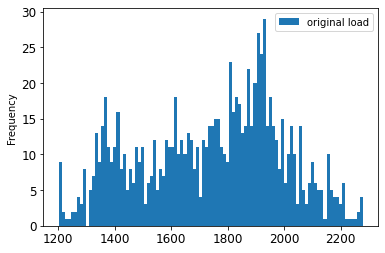

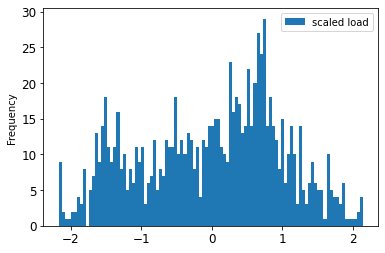

In [21]:
stlf_data[(stlf_data.index >=6817) & (stlf_data.index <=7777)][['Cons']].rename(columns={'Cons':'original load'}).plot.hist(bins=100, fontsize=12)
valid[(valid.index >=6817) & (valid.index <=7777)][['Cons']].rename(columns={'Cons':'scaled load'}).plot.hist(bins=100, fontsize=12)
plt.show()

In [22]:
valid_shifted = valid.copy()
valid_shifted=valid_shifted.astype(np.float64)
valid_shifted['y_t+100'] = valid_shifted['Cons'].shift(-100)
valid_shifted.head(10)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+100
6817,-0.206997,-0.400218,0.905233,-1.658081,1.441195,-1.003127,0.383925,0.744973,1.075970,-0.640864,-0.566621,-0.632388,0.526059,-0.587243
6818,-0.515196,-0.506184,0.958572,-1.658081,1.441195,-1.003127,0.251071,0.567690,1.100092,-0.530108,-0.600850,-0.734412,0.383022,-0.591245
6819,-0.483175,-0.612151,1.011912,-1.658081,1.441195,-1.003127,0.114191,0.567690,1.023705,-0.587396,-0.688322,-0.832657,0.249474,-0.647281
6820,-0.551219,-0.612151,1.011912,-1.513750,1.441195,-1.003127,-0.095155,0.567690,0.979481,-0.640864,-0.760582,-0.908230,0.113818,-0.839405
6821,-0.571232,-0.612151,1.011912,-1.513750,1.441195,-1.003127,-0.215931,0.378321,0.738258,-0.805088,-0.817629,-0.995139,-0.002510,-1.291697
6822,-0.779367,-0.592631,0.997433,-1.513750,1.441195,-1.003127,-0.525924,0.245359,0.561361,-0.839460,-0.775794,-0.991361,-0.121649,-1.047540
6823,-0.667294,-0.573111,0.982954,-1.513750,1.441195,-1.003127,-0.493717,0.108368,0.561361,-0.835641,-0.878479,-0.968689,-0.230947,-1.079560
6824,-0.707320,-0.573111,0.982954,-1.369419,1.441195,-1.003127,-0.562157,-0.101148,0.561361,-0.892929,-0.893692,-1.066934,-0.343760,-1.119586
6825,-0.791374,-0.573111,0.982954,-1.369419,1.441195,-1.003127,-0.582287,-0.222022,0.372402,-0.965493,-0.931723,-1.134950,-0.447436,-1.083563
6826,-0.803382,-0.857548,1.108550,-1.369419,1.441195,-1.003127,-0.791633,-0.532267,0.239730,-1.007503,-1.011590,-1.184072,-0.540568,-1.031529


In [23]:
for t in range(1, T+1):
    valid_shifted['Cons_t-'+str(T-t)] = valid_shifted['Cons'].shift(T-t)
valid_shifted = valid_shifted.rename(columns={'Cons':'Cons_original'})
valid_shifted.head(10)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,...,Cons_t-9,Cons_t-8,Cons_t-7,Cons_t-6,Cons_t-5,Cons_t-4,Cons_t-3,Cons_t-2,Cons_t-1,Cons_t-0
6817,-0.206997,-0.400218,0.905233,-1.658081,1.441195,-1.003127,0.383925,0.744973,1.075970,-0.640864,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.206997
6818,-0.515196,-0.506184,0.958572,-1.658081,1.441195,-1.003127,0.251071,0.567690,1.100092,-0.530108,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.206997,-0.515196
6819,-0.483175,-0.612151,1.011912,-1.658081,1.441195,-1.003127,0.114191,0.567690,1.023705,-0.587396,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.206997,-0.515196,-0.483175
6820,-0.551219,-0.612151,1.011912,-1.513750,1.441195,-1.003127,-0.095155,0.567690,0.979481,-0.640864,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.206997,-0.515196,-0.483175,-0.551219
6821,-0.571232,-0.612151,1.011912,-1.513750,1.441195,-1.003127,-0.215931,0.378321,0.738258,-0.805088,...,NaN,NaN,NaN,NaN,NaN,-0.206997,-0.515196,-0.483175,-0.551219,-0.571232
6822,-0.779367,-0.592631,0.997433,-1.513750,1.441195,-1.003127,-0.525924,0.245359,0.561361,-0.839460,...,NaN,NaN,NaN,NaN,-0.206997,-0.515196,-0.483175,-0.551219,-0.571232,-0.779367
6823,-0.667294,-0.573111,0.982954,-1.513750,1.441195,-1.003127,-0.493717,0.108368,0.561361,-0.835641,...,NaN,NaN,NaN,-0.206997,-0.515196,-0.483175,-0.551219,-0.571232,-0.779367,-0.667294
6824,-0.707320,-0.573111,0.982954,-1.369419,1.441195,-1.003127,-0.562157,-0.101148,0.561361,-0.892929,...,NaN,NaN,-0.206997,-0.515196,-0.483175,-0.551219,-0.571232,-0.779367,-0.667294,-0.707320
6825,-0.791374,-0.573111,0.982954,-1.369419,1.441195,-1.003127,-0.582287,-0.222022,0.372402,-0.965493,...,NaN,-0.206997,-0.515196,-0.483175,-0.551219,-0.571232,-0.779367,-0.667294,-0.707320,-0.791374
6826,-0.803382,-0.857548,1.108550,-1.369419,1.441195,-1.003127,-0.791633,-0.532267,0.239730,-1.007503,...,-0.206997,-0.515196,-0.483175,-0.551219,-0.571232,-0.779367,-0.667294,-0.707320,-0.791374,-0.803382


In [24]:
valid_shifted = valid_shifted.dropna(how='any')

In [25]:
valid_shifted.tail(10)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,...,Cons_t-9,Cons_t-8,Cons_t-7,Cons_t-6,Cons_t-5,Cons_t-4,Cons_t-3,Cons_t-2,Cons_t-1,Cons_t-0
7668,-0.335080,0.659450,-1.128998,1.372873,-1.256834,-1.003127,-0.066974,0.003610,-0.262819,0.214628,...,0.081189,0.017147,-0.038889,0.045165,0.017147,-0.058902,-0.134951,-0.259031,-0.363098,-0.335080
7669,-0.327075,0.659450,-1.128998,1.372873,-1.256834,-1.003127,-0.143466,-0.052798,-0.122105,0.222266,...,0.017147,-0.038889,0.045165,0.017147,-0.058902,-0.134951,-0.259031,-0.363098,-0.335080,-0.327075
7670,-0.315067,0.163079,-0.522097,1.372873,-1.256834,-1.003127,-0.268268,0.031814,0.006547,0.210809,...,-0.038889,0.045165,0.017147,-0.058902,-0.134951,-0.259031,-0.363098,-0.335080,-0.327075,-0.315067
7671,-0.343085,-0.333291,0.084804,1.372873,-1.256834,-1.003127,-0.372941,0.003610,0.062833,0.111511,...,0.045165,0.017147,-0.058902,-0.134951,-0.259031,-0.363098,-0.335080,-0.327075,-0.315067,-0.343085
7672,-0.439147,-0.333291,0.084804,1.517204,-1.256834,-1.003127,-0.344760,-0.072944,-0.001494,0.000755,...,0.017147,-0.058902,-0.134951,-0.259031,-0.363098,-0.335080,-0.327075,-0.315067,-0.343085,-0.439147
7673,-0.511194,-0.333291,0.084804,1.517204,-1.256834,-1.003127,-0.336708,-0.149498,-0.057779,-0.064171,...,-0.058902,-0.134951,-0.259031,-0.363098,-0.335080,-0.327075,-0.315067,-0.343085,-0.439147,-0.511194
7674,-0.531206,-0.396035,0.194411,1.517204,-1.256834,-1.003127,-0.324630,-0.274401,0.026649,-0.102362,...,-0.134951,-0.259031,-0.363098,-0.335080,-0.327075,-0.315067,-0.343085,-0.439147,-0.511194,-0.531206
7675,-0.675299,-0.458778,0.304019,1.517204,-1.256834,-1.003127,-0.352811,-0.379159,-0.001494,-0.174926,...,-0.259031,-0.363098,-0.335080,-0.327075,-0.315067,-0.343085,-0.439147,-0.511194,-0.531206,-0.675299
7676,-0.811387,-0.458778,0.304019,1.661535,-1.256834,-1.003127,-0.449433,-0.350955,-0.077881,-0.304778,...,-0.363098,-0.335080,-0.327075,-0.315067,-0.343085,-0.439147,-0.511194,-0.531206,-0.675299,-0.811387
7677,-0.935467,-0.458778,0.304019,1.661535,-1.256834,-1.003127,-0.521898,-0.342897,-0.154268,-0.434629,...,-0.335080,-0.327075,-0.315067,-0.343085,-0.439147,-0.511194,-0.531206,-0.675299,-0.811387,-0.935467


In [26]:
y_valid = valid_shifted[['y_t+100']]
y_valid


,y_t+100
6827,-1.111581
6828,-1.159612
6829,-1.091568
6830,-1.027527
6831,-1.075558
...,...
7673,-1.335726
7674,-1.587888
7675,-1.623911
7676,-1.647927


In [27]:
X_valid = valid_shifted[['Cons_original','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
X_valid


,Cons_original,Temp,Hum,A,B,C,D,E,F,G,H,I,J
6827,-0.831400,-1.141985,1.234146,-1.369419,1.441195,-1.003127,-0.678908,-0.500033,0.103037,-1.080068,-1.015393,-1.153843,-0.624211
6828,-0.947475,-1.141985,1.234146,-1.225087,1.441195,-1.003127,-0.719167,-0.568529,-0.106024,-1.129717,-1.042015,-1.142507,-0.699771
6829,-0.967488,-1.141985,1.234146,-1.225087,1.441195,-1.003127,-0.803710,-0.588675,-0.226635,-1.141174,-1.068637,-1.267203,-0.766545
6830,-0.987501,-1.179631,1.251445,-1.225087,1.441195,-1.003127,-0.815788,-0.798190,-0.536205,-1.106802,-1.076243,-1.195408,-0.808015
6831,-0.963485,-1.217277,1.268744,-1.225087,1.441195,-1.003127,-0.843969,-0.685374,-0.504042,-1.133536,-1.099062,-1.165179,-0.850188
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7673,-0.511194,-0.333291,0.084804,1.517204,-1.256834,-1.003127,-0.336708,-0.149498,-0.057779,-0.064171,-0.429708,-0.511471,-0.275580
7674,-0.531206,-0.396035,0.194411,1.517204,-1.256834,-1.003127,-0.324630,-0.274401,0.026649,-0.102362,-0.425905,-0.549258,-0.326188
7675,-0.675299,-0.458778,0.304019,1.517204,-1.256834,-1.003127,-0.352811,-0.379159,-0.001494,-0.174926,-0.528590,-0.598380,-0.386988
7676,-0.811387,-0.458778,0.304019,1.661535,-1.256834,-1.003127,-0.449433,-0.350955,-0.077881,-0.304778,-0.631275,-0.738191,-0.453059


In [28]:
X_valid=np.atleast_3d(X_valid)

print(X_valid.shape)

(851, 13, 1)


In [29]:
#from keras.layers import RepeatVector
batch_size = 300

model = models.Sequential()

model.add(LSTM(64, input_shape=(1,1)))
model.add(Dropout(0.2))
#model.add(Dropout(0.5))
#model.add(Dropout(0.5))
#model.add(Dropout(0.1))
#model.add(Flatten())
model.add(Dense(1))

In [30]:
from keras import optimizers
sgd = optimizers.Adam(lr=0.0001)
model.compile(sgd, loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 64)                16896     
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 65        
Total params: 16,961
Trainable params: 16,961
Non-trainable params: 0
_________________________________________________________________


In [31]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5)

In [32]:

history = model.fit(X_train,
          y_train,
          batch_size=250,
          epochs=300,verbose=1,
          validation_data=(X_valid, y_valid),callbacks=[earlystop],
          )


Epoch 1/300
27/27 [==============================] - 2s 62ms/step - loss: 0.8386 - val_loss: 0.7107
Epoch 2/300
27/27 [==============================] - 1s 25ms/step - loss: 0.7567 - val_loss: 0.6400
Epoch 3/300
27/27 [==============================] - 1s 25ms/step - loss: 0.6912 - val_loss: 0.5908
Epoch 4/300
27/27 [==============================] - 1s 24ms/step - loss: 0.6493 - val_loss: 0.5652
Epoch 5/300
27/27 [==============================] - 1s 24ms/step - loss: 0.6290 - val_loss: 0.5597
Epoch 6/300
27/27 [==============================] - 1s 24ms/step - loss: 0.6220 - val_loss: 0.5601
Epoch 7/300
27/27 [==============================] - 1s 24ms/step - loss: 0.6216 - val_loss: 0.5596
Epoch 8/300
27/27 [==============================] - 1s 24ms/step - loss: 0.6191 - val_loss: 0.5562
Epoch 9/300
27/27 [==============================] - 1s 24ms/step - loss: 0.6143 - val_loss: 0.5539
Epoch 10/300
27/27 [==============================] - 1s 24ms/step - loss: 0.6152 - val_loss: 0.5502

27/27 [==============================] - 1s 26ms/step - loss: 0.4092 - val_loss: 0.3279
Epoch 76/300
27/27 [==============================] - 1s 26ms/step - loss: 0.4025 - val_loss: 0.3233
Epoch 77/300
27/27 [==============================] - 1s 32ms/step - loss: 0.3981 - val_loss: 0.3297
Epoch 78/300
27/27 [==============================] - 1s 25ms/step - loss: 0.3939 - val_loss: 0.3220
Epoch 79/300
27/27 [==============================] - 1s 34ms/step - loss: 0.3888 - val_loss: 0.3246
Epoch 80/300
27/27 [==============================] - 1s 31ms/step - loss: 0.3823 - val_loss: 0.3152
Epoch 81/300
27/27 [==============================] - 1s 23ms/step - loss: 0.3755 - val_loss: 0.3022
Epoch 82/300
27/27 [==============================] - 1s 30ms/step - loss: 0.3710 - val_loss: 0.3038
Epoch 83/300
27/27 [==============================] - 1s 33ms/step - loss: 0.3628 - val_loss: 0.3020
Epoch 84/300
27/27 [==============================] - 1s 27ms/step - loss: 0.3563 - val_loss: 0.2927
Epo

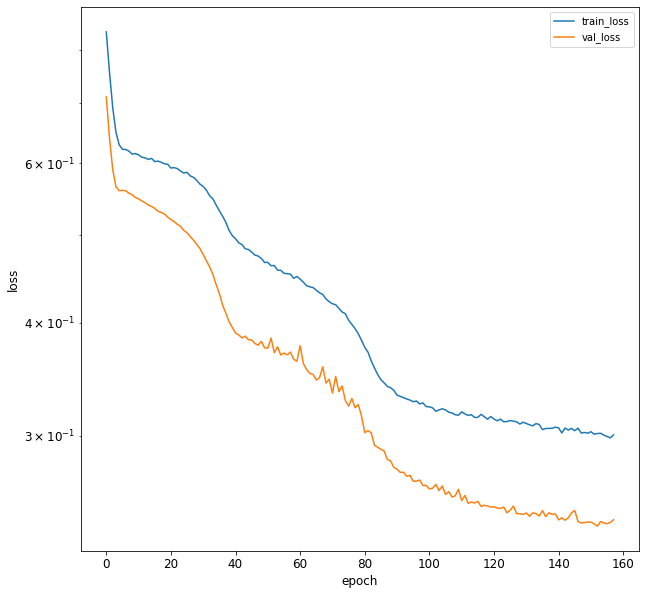

In [33]:
plot_df = pd.DataFrame.from_dict({'train_loss':history.history['loss'], 'val_loss':history.history['val_loss']})
plot_df.plot(logy=True, figsize=(10,10), fontsize=12)
plt.xlabel('epoch', fontsize=12)
plt.ylabel('loss', fontsize=12)
plt.show()



In [34]:
test = stlf_data.copy()[(stlf_data.index >= 7778) & (stlf_data.index<= 7989)][['Cons','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
test.head(20)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
7778,1266.0,11.157452,90.256377,1.0,3.0,1.0,1346.0,1645.0,1769.0,1386.0,1498.0,1475.0,1482.083333
7779,1251.0,10.852452,92.354170,1.0,3.0,1.0,1337.0,1589.0,1689.0,1371.0,1480.0,1451.0,1445.583333
7780,1210.0,10.852452,92.354170,2.0,3.0,1.0,1331.0,1538.0,1682.0,1350.0,1436.0,1430.0,1406.250000
7781,1230.0,10.852452,92.354170,2.0,3.0,1.0,1282.0,1409.0,1671.0,1333.0,1445.0,1411.0,1369.500000
7782,1247.0,10.827452,92.414655,2.0,3.0,1.0,1266.0,1346.0,1645.0,1333.0,1445.0,1402.0,1336.333333
7783,1237.0,10.802452,92.475140,2.0,3.0,1.0,1251.0,1337.0,1589.0,1336.0,1423.0,1391.0,1307.000000
7784,1243.0,10.802452,92.475140,3.0,3.0,1.0,1210.0,1331.0,1538.0,1319.0,1422.0,1378.0,1282.416667
7785,1244.0,10.802452,92.475140,3.0,3.0,1.0,1230.0,1282.0,1409.0,1298.0,1409.0,1377.0,1268.666667
7786,1226.0,10.872452,92.077738,3.0,3.0,1.0,1247.0,1266.0,1346.0,1298.0,1395.0,1370.0,1258.666667
7787,1226.0,10.942452,91.680336,3.0,3.0,1.0,1237.0,1251.0,1337.0,1276.0,1389.0,1352.0,1249.416667


In [35]:
from sklearn.preprocessing import MinMaxScaler
scaler = StandardScaler()
test[['Cons', 'Temp', 'Hum', 'A','B','C','D','E','F','G','H','I','J']] = scaler.fit_transform(test)
test.head(10)
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 212 entries, 7778 to 7989
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Cons    212 non-null    float64
 1   Temp    212 non-null    float64
 2   Hum     212 non-null    float64
 3   A       212 non-null    float64
 4   B       212 non-null    float64
 5   C       212 non-null    float64
 6   D       212 non-null    float64
 7   E       212 non-null    float64
 8   F       212 non-null    float64
 9   G       212 non-null    float64
 10  H       212 non-null    float64
 11  I       212 non-null    float64
 12  J       212 non-null    float64
dtypes: float64(13)
memory usage: 23.2 KB


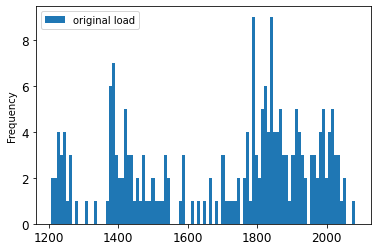

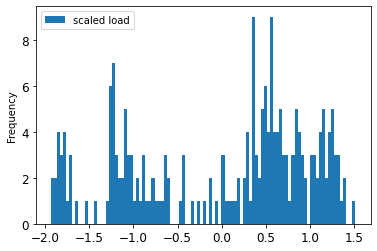

In [36]:
stlf_data[(stlf_data.index >= 7778) & (stlf_data.index <=7989)][['Cons']].rename(columns={'Cons':'original load'}).plot.hist(bins=100, fontsize=12)
test[(test.index >=7778) & (test.index <= 7989)][['Cons']].rename(columns={'Cons':'scaled load'}).plot.hist(bins=100, fontsize=12)
plt.show()

In [37]:
test_shifted = test.copy()
test_shifted=test_shifted.astype(np.float64)
test_shifted['y_t+100'] = test_shifted['Cons'].shift(-100)
test_shifted.head(10)


,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+100
7778,-1.695814,-0.689298,0.964391,-1.498364,-1.004934,0.0,-1.365295,-0.214680,0.253435,-1.046706,-0.414813,-0.733959,-0.887962,-1.004984
7779,-1.754692,-0.779463,1.098770,-1.498364,-1.004934,0.0,-1.400353,-0.434991,-0.065865,-1.105681,-0.500123,-0.840385,-1.037618,-1.075637
7780,-1.915624,-0.779463,1.098770,-1.357685,-1.004934,0.0,-1.423724,-0.635632,-0.093804,-1.188246,-0.708659,-0.933507,-1.198891,-1.087412
7781,-1.837121,-0.779463,1.098770,-1.357685,-1.004934,0.0,-1.614594,-1.143136,-0.137708,-1.255083,-0.666004,-1.017761,-1.349572,-1.181617
7782,-1.770393,-0.786853,1.102645,-1.357685,-1.004934,0.0,-1.676919,-1.390987,-0.241481,-1.255083,-0.666004,-1.057671,-1.485561,-1.220868
7783,-1.809645,-0.794244,1.106519,-1.357685,-1.004934,0.0,-1.735349,-1.426394,-0.464991,-1.243289,-0.770271,-1.106450,-1.605832,-1.240494
7784,-1.786094,-0.794244,1.106519,-1.217006,-1.004934,0.0,-1.895056,-1.449999,-0.668545,-1.310126,-0.775011,-1.164097,-1.706628,-1.260120
7785,-1.782168,-0.794244,1.106519,-1.217006,-1.004934,0.0,-1.817150,-1.642772,-1.183417,-1.392691,-0.836624,-1.168532,-1.763005,-1.256195
7786,-1.852821,-0.773550,1.081063,-1.217006,-1.004934,0.0,-1.750930,-1.705718,-1.434867,-1.392691,-0.902976,-1.199572,-1.804007,-1.256195
7787,-1.852821,-0.752857,1.055606,-1.217006,-1.004934,0.0,-1.789883,-1.764730,-1.470788,-1.479187,-0.931412,-1.279392,-1.841933,-1.236569


In [38]:
for t in range(1, T+1):
    test_shifted['Cons_t-'+str(T-t)] = test_shifted['Cons'].shift(T-t)
test_shifted = test_shifted.rename(columns={'Cons':'Cons_original'})
test_shifted.head(10)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,...,Cons_t-9,Cons_t-8,Cons_t-7,Cons_t-6,Cons_t-5,Cons_t-4,Cons_t-3,Cons_t-2,Cons_t-1,Cons_t-0
7778,-1.695814,-0.689298,0.964391,-1.498364,-1.004934,0.0,-1.365295,-0.214680,0.253435,-1.046706,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.695814
7779,-1.754692,-0.779463,1.098770,-1.498364,-1.004934,0.0,-1.400353,-0.434991,-0.065865,-1.105681,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.695814,-1.754692
7780,-1.915624,-0.779463,1.098770,-1.357685,-1.004934,0.0,-1.423724,-0.635632,-0.093804,-1.188246,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.695814,-1.754692,-1.915624
7781,-1.837121,-0.779463,1.098770,-1.357685,-1.004934,0.0,-1.614594,-1.143136,-0.137708,-1.255083,...,NaN,NaN,NaN,NaN,NaN,NaN,-1.695814,-1.754692,-1.915624,-1.837121
7782,-1.770393,-0.786853,1.102645,-1.357685,-1.004934,0.0,-1.676919,-1.390987,-0.241481,-1.255083,...,NaN,NaN,NaN,NaN,NaN,-1.695814,-1.754692,-1.915624,-1.837121,-1.770393
7783,-1.809645,-0.794244,1.106519,-1.357685,-1.004934,0.0,-1.735349,-1.426394,-0.464991,-1.243289,...,NaN,NaN,NaN,NaN,-1.695814,-1.754692,-1.915624,-1.837121,-1.770393,-1.809645
7784,-1.786094,-0.794244,1.106519,-1.217006,-1.004934,0.0,-1.895056,-1.449999,-0.668545,-1.310126,...,NaN,NaN,NaN,-1.695814,-1.754692,-1.915624,-1.837121,-1.770393,-1.809645,-1.786094
7785,-1.782168,-0.794244,1.106519,-1.217006,-1.004934,0.0,-1.817150,-1.642772,-1.183417,-1.392691,...,NaN,NaN,-1.695814,-1.754692,-1.915624,-1.837121,-1.770393,-1.809645,-1.786094,-1.782168
7786,-1.852821,-0.773550,1.081063,-1.217006,-1.004934,0.0,-1.750930,-1.705718,-1.434867,-1.392691,...,NaN,-1.695814,-1.754692,-1.915624,-1.837121,-1.770393,-1.809645,-1.786094,-1.782168,-1.852821
7787,-1.852821,-0.752857,1.055606,-1.217006,-1.004934,0.0,-1.789883,-1.764730,-1.470788,-1.479187,...,-1.695814,-1.754692,-1.915624,-1.837121,-1.770393,-1.809645,-1.786094,-1.782168,-1.852821,-1.852821


In [39]:
test_shifted = test_shifted.dropna(how='any')
test_shifted.tail(5)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,...,Cons_t-9,Cons_t-8,Cons_t-7,Cons_t-6,Cons_t-5,Cons_t-4,Cons_t-3,Cons_t-2,Cons_t-1,Cons_t-0
7885,-1.256195,-1.160814,1.133625,-1.076327,0.516823,0.0,-1.166634,-0.973968,-0.828195,-1.754402,...,-0.997133,-0.965732,-1.004984,-1.075637,-1.087412,-1.181617,-1.220868,-1.240494,-1.260120,-1.256195
7886,-1.256195,-1.184463,1.123223,-1.076327,0.516823,0.0,-1.205587,-1.013310,-0.844160,-1.671837,...,-0.965732,-1.004984,-1.075637,-1.087412,-1.181617,-1.220868,-1.240494,-1.260120,-1.256195,-1.256195
7887,-1.236569,-1.208113,1.112822,-1.076327,0.516823,0.0,-1.225064,-1.084124,-0.939951,-1.640384,...,-1.004984,-1.075637,-1.087412,-1.181617,-1.220868,-1.240494,-1.260120,-1.256195,-1.256195,-1.236569
7888,-1.236569,-1.208113,1.112822,-0.935648,0.516823,0.0,-1.244540,-1.095927,-1.043723,-1.695427,...,-1.075637,-1.087412,-1.181617,-1.220868,-1.240494,-1.260120,-1.256195,-1.256195,-1.236569,-1.236569
7889,-1.173766,-1.208113,1.112822,-0.935648,0.516823,0.0,-1.240645,-1.190346,-1.011793,-1.644316,...,-1.087412,-1.181617,-1.220868,-1.240494,-1.260120,-1.256195,-1.256195,-1.236569,-1.236569,-1.173766


In [40]:
y_test = test_shifted[['y_t+100']]
y_test

,y_t+100
7788,-1.236569
7789,-1.173766
7790,-1.134514
7791,-1.052086
7792,-1.016759
...,...
7885,-1.209093
7886,-1.417127
7887,-1.138440
7888,-1.083487


In [41]:
X_test = test_shifted[['Cons_original','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
X_test

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,H,I,J
7788,-1.892073,-0.752857,1.055606,-1.076327,-1.004934,0.0,-1.766511,-1.926030,-1.494736,-1.479187,-1.059377,-1.314867,-1.881227
7789,-1.931325,-0.752857,1.055606,-1.076327,-1.004934,0.0,-1.762616,-1.847347,-1.690307,-1.467392,-1.002504,-1.368080,-1.907194
7790,-1.848896,-0.726251,0.993562,-1.076327,-1.004934,0.0,-1.832731,-1.780467,-1.754167,-1.770128,-1.007244,-1.372515,-1.920520
7791,-1.817495,-0.699645,0.931517,-1.076327,-1.004934,0.0,-1.832731,-1.819808,-1.814036,-1.490982,-1.021462,-1.314867,-1.925987
7792,-1.872447,-0.699645,0.931517,-0.935648,-1.004934,0.0,-1.871684,-1.796203,-1.977678,-1.439871,-1.049899,-1.337039,-1.922228
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7885,-1.256195,-1.160814,1.133625,-1.076327,0.516823,0.0,-1.166634,-0.973968,-0.828195,-1.754402,-1.452751,-1.181835,-1.132947
7886,-1.256195,-1.184463,1.123223,-1.076327,0.516823,0.0,-1.205587,-1.013310,-0.844160,-1.671837,-1.817688,-1.186269,-1.172582
7887,-1.236569,-1.208113,1.112822,-1.076327,0.516823,0.0,-1.225064,-1.084124,-0.939951,-1.640384,-1.481188,-1.199572,-1.202308
7888,-1.236569,-1.208113,1.112822,-0.935648,0.516823,0.0,-1.244540,-1.095927,-1.043723,-1.695427,-1.419575,-1.226179,-1.223151


In [42]:
X_test=np.atleast_3d(X_test)
X_test.shape

(102, 13, 1)

In [43]:
#subsequences=2
#X_test=X_test//subsequences
#X_test=X_test.reshape(1488,subsequences,12,1)
#print(X_test.shape)
X_test=X_test.reshape(102,13,1)

In [44]:
predictions = model.predict(X_test)
predictions

array([[-0.98012686],
       [-0.9654639 ],
       [-0.95062083],
       [-0.8953888 ],
       [-0.8690771 ],
       [-0.83638924],
       [-0.808878  ],
       [-0.7016779 ],
       [-0.66261977],
       [-0.5552801 ],
       [-0.36204672],
       [-0.07763061],
       [ 0.16685863],
       [ 0.33735463],
       [ 0.41657192],
       [ 0.47603586],
       [ 0.5887408 ],
       [ 0.6540977 ],
       [ 0.717455  ],
       [ 0.7558191 ],
       [ 0.7499564 ],
       [ 0.7329882 ],
       [ 0.8573716 ],
       [ 0.9795882 ],
       [ 1.1027532 ],
       [ 0.9449192 ],
       [ 0.8780307 ],
       [ 0.87348706],
       [ 0.7962628 ],
       [ 0.94234633],
       [ 1.0378726 ],
       [ 1.0539047 ],
       [ 1.0763079 ],
       [ 1.0891397 ],
       [ 1.0880427 ],
       [ 1.0574456 ],
       [ 1.0943867 ],
       [ 1.1120954 ],
       [ 1.1354955 ],
       [ 1.10055   ],
       [ 1.0275333 ],
       [ 0.98986256],
       [ 0.9995162 ],
       [ 1.0382181 ],
       [ 0.9966677 ],
       [ 1

In [45]:
feature=stlf_data.copy()[(stlf_data.index >= 7778) & (stlf_data.index <=7989)][['Cons']]
#test_mean=cons.mean()
#test_mean
load_mean=feature.mean()
print(load_mean)
load_std=feature.std()
print(load_std)

Cons    1698.035377
dtype: float64
Cons    255.368705
dtype: float64


In [46]:
load_mean=1698.035377
load_std=255.368705
rescaled_target_load=(y_test*load_std)+load_mean
print(rescaled_target_load.shape)


(102, 1)


In [47]:
rescaled_predicted_load=(predictions*load_std)+load_mean
print(rescaled_predicted_load.shape)

(102, 1)


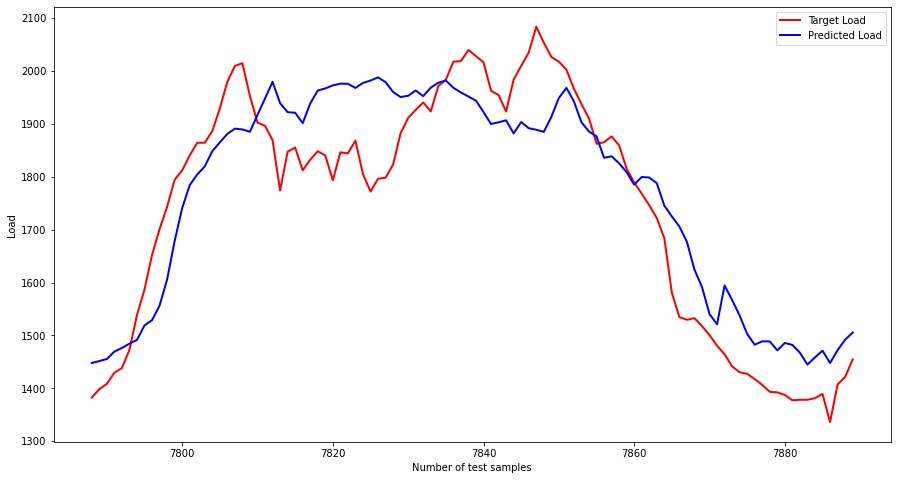

In [48]:
timestamp = y_test.index
plt.figure(figsize = (15,8))
plt.plot(timestamp,rescaled_target_load,label="Target Load",color='red', linestyle='solid',linewidth=2)

plt.plot(timestamp,rescaled_predicted_load,label="Predicted Load",color='blue', linestyle='solid',linewidth=2)

plt.xlabel('Number of test samples') 
plt.ylabel('Load') 
plt.legend()
plt.show()

In [49]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true),np.array(y_pred)

    ## Note: does not handle mix 1d representation
    #if _is_1d(y_true): 
    #    y_true, y_pred = _check_1d_array(y_true, y_pred)

    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

MAPE=mean_absolute_percentage_error(rescaled_target_load, rescaled_predicted_load)
print(MAPE)

4.778081046711746


In [50]:
MPE=np.mean((rescaled_target_load - rescaled_predicted_load) / rescaled_target_load) * 100
print(MPE)

y_t+100   -1.689022
dtype: float64


In [51]:
PE=((rescaled_target_load - rescaled_predicted_load / rescaled_target_load)) * 100
APE=np.abs(PE)
print(APE)

            y_t+100
7788  138120.697502
7789  139725.418011
7790  140728.254551
7791  142833.759977
7792  143736.067762
...             ...
7885  138821.201520
7886  133506.195342
7887  140626.751104
7888  142029.704929
7889  145338.981197

[102 rows x 1 columns]


In [52]:
error = np.subtract(rescaled_target_load,rescaled_predicted_load)
sqerr=np.square(error)
print(sqerr)
MSE=sqerr.mean()
print(MSE)

           y_t+100
7788   4288.592616
7789   2829.586939
7790   2205.309271
7791   1601.240917
7792   1422.303928
...            ...
7885   6696.993215
7886  12454.261888
7887   4193.157093
7888   4972.249544
7889   2584.619095

[102 rows x 1 columns]
y_t+100    8994.944467
dtype: float64


In [53]:
RMSE=MSE**0.5
print(RMSE)

y_t+100    94.841681
dtype: float64


In [54]:
a=np.array(rescaled_predicted_load)

In [55]:
for i in  range(0,102):
    b=a[i]
    print(b)

[1447.7417]
[1451.4861]
[1455.2766]
[1469.3811]
[1476.1003]
[1484.4478]
[1491.4733]
[1518.8489]
[1528.823]
[1556.2343]
[1605.58]
[1678.2109]
[1740.6459]
[1784.1852]
[1804.4148]
[1819.6001]
[1848.3813]
[1865.0715]
[1881.251]
[1891.048]
[1889.5508]
[1885.2177]
[1916.9813]
[1948.1915]
[1979.644]
[1939.3381]
[1922.257]
[1921.0967]
[1901.376]
[1938.6812]
[1963.0756]
[1967.1697]
[1972.8907]
[1976.1676]
[1975.8875]
[1968.074]
[1977.5076]
[1982.0298]
[1988.0054]
[1979.0814]
[1960.4353]
[1950.8153]
[1953.2805]
[1963.1638]
[1952.5531]
[1968.5652]
[1977.9607]
[1982.0916]
[1968.4857]
[1959.4531]
[1951.7577]
[1943.9418]
[1922.505]
[1899.7909]
[1903.1033]
[1906.8182]
[1881.9951]
[1903.5546]
[1891.9573]
[1888.9441]
[1884.9567]
[1912.9921]
[1949.0463]
[1968.1074]
[1942.6613]
[1903.1685]
[1885.6006]
[1876.3347]
[1835.9222]
[1838.7325]
[1825.5297]
[1808.7721]
[1785.1805]
[1799.5735]
[1798.6317]
[1787.9283]
[1745.4694]
[1725.0582]
[1705.9683]
[1677.0146]
[1624.5188]
[1591.6718]
[1540.3845]
[1521.1041]
[1